In [1]:
%pip install snap-stanford

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install gzip

In [ ]:
%pip install python-louvain

In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


**Louvain Method**

Number of Nodes: 5242
Number of Edges: 14496
Degree: 1, Count: 1197
Degree: 2, Count: 1114
Degree: 3, Count: 776
Degree: 4, Count: 498
Degree: 5, Count: 296
Degree: 6, Count: 225
Degree: 7, Count: 159
Degree: 8, Count: 141
Degree: 9, Count: 99
Degree: 10, Count: 92
Degree: 11, Count: 66
Degree: 12, Count: 46
Degree: 13, Count: 57
Degree: 14, Count: 38
Degree: 15, Count: 48
Degree: 16, Count: 25
Degree: 17, Count: 43
Degree: 18, Count: 21
Degree: 19, Count: 18
Degree: 20, Count: 28
Degree: 21, Count: 16
Degree: 22, Count: 12
Degree: 23, Count: 44
Degree: 24, Count: 8
Degree: 25, Count: 8
Degree: 26, Count: 7
Degree: 27, Count: 3
Degree: 28, Count: 5
Degree: 29, Count: 3
Degree: 30, Count: 8
Degree: 31, Count: 9
Degree: 32, Count: 3
Degree: 33, Count: 9
Degree: 34, Count: 37
Degree: 35, Count: 1
Degree: 36, Count: 2
Degree: 37, Count: 5
Degree: 38, Count: 1
Degree: 40, Count: 1
Degree: 41, Count: 3
Degree: 42, Count: 19
Degree: 43, Count: 2
Degree: 44, Count: 1
Degree: 45, Count: 13
Degr

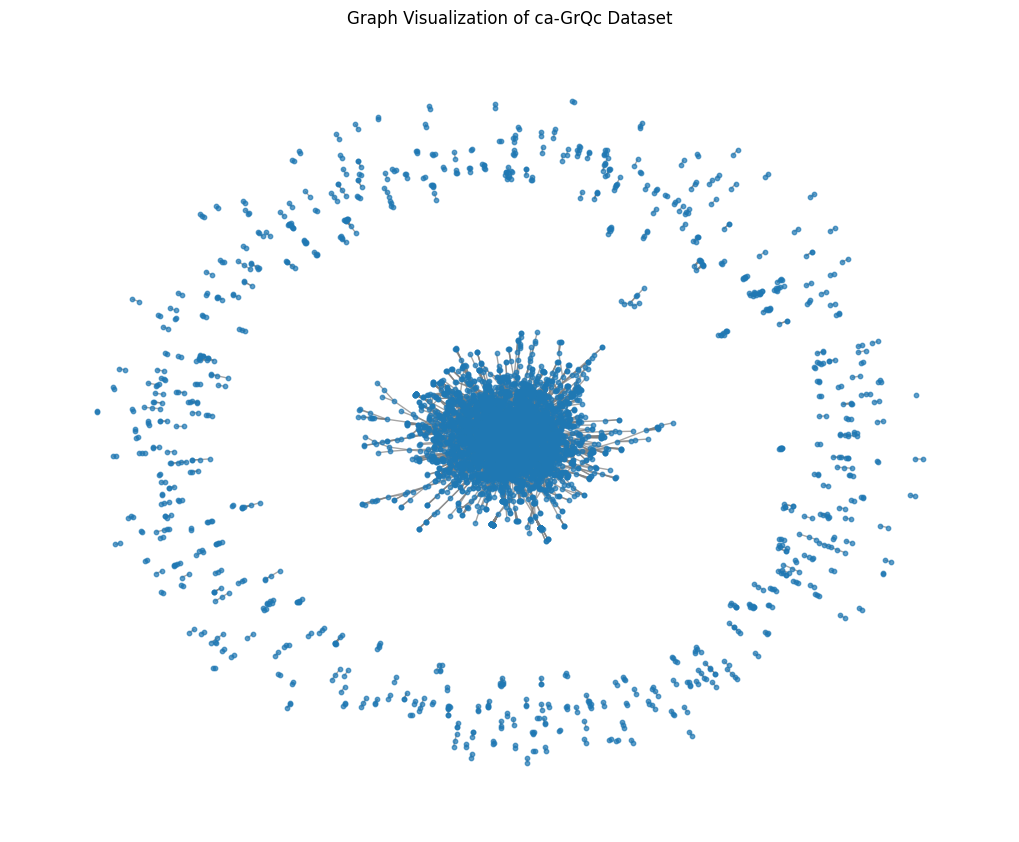

Clustering Coefficient: 0.5304030148368244
Graph Diameter: 14
Number of Connected Components: 355


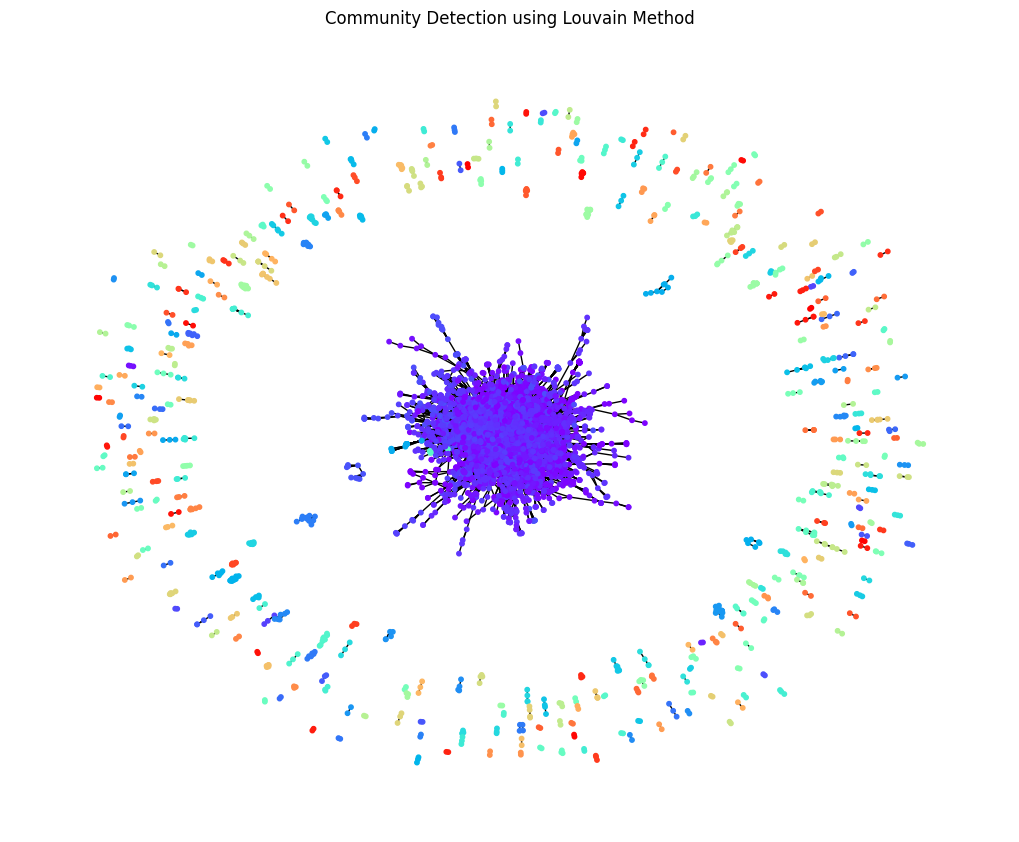

In [25]:
import snap
import gzip
import networkx as nx
import community as community_louvain

import matplotlib.pyplot as plt


def load_graph_from_gz(file_path):
    G = snap.TUNGraph.New()  # Create an undirected graph

    with gzip.open(file_path, "rt") as f:  # Read as text
        for line in f:
            if line.startswith("#"):  # Ignore comments in the file
                continue
            u, v = map(int, line.strip().split())  # Read node pairs
            if not G.IsNode(u):
                G.AddNode(u)
            if not G.IsNode(v):
                G.AddNode(v)
            G.AddEdge(u, v)

    return G


def snap_to_nx(snap_graph):
    nx_graph = nx.Graph()
    for node in snap_graph.Nodes():
        nx_graph.add_node(node.GetId())
    for edge in snap_graph.Edges():
        nx_graph.add_edge(edge.GetSrcNId(), edge.GetDstNId())
    return nx_graph


# Load the graph
file_path = 'ca-GrQc.txt.gz'
snap_graph = load_graph_from_gz(file_path)

# Basic graph properties
print("Number of Nodes:", snap_graph.GetNodes())
print("Number of Edges:", snap_graph.GetEdges())

# Compute degree distribution
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(snap_graph, DegToCntV)

# Print degree distribution
for item in DegToCntV:
    print(f"Degree: {item.GetVal1()}, Count: {item.GetVal2()}")

# Convert to NetworkX graph
nx_graph = snap_to_nx(snap_graph)
no_loop = [(u, v) for u, v in nx_graph.edges() if u != v]

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, edgelist = no_loop,  node_size=10, edge_color="gray", alpha=0.7, with_labels=False)
plt.title("Graph Visualization of ca-GrQc Dataset")
plt.show()

# Compute key metrics
clustering_coeff = snap.GetClustCf(snap_graph)
print("Clustering Coefficient:", clustering_coeff)

diameter = snap.GetBfsFullDiam(snap_graph, 100, False)
print("Graph Diameter:", diameter)

components = snap.TCnComV()
snap.GetWccs(snap_graph, components)
print("Number of Connected Components:", len(components))

# Community detection
partition = community_louvain.best_partition(nx_graph)

# Visualize communities
plt.figure(figsize=(10, 8))
nx.draw(
    nx_graph,
    edgelist = no_loop,  
    node_color=list(partition.values()),
    node_size=10,
    cmap=plt.cm.rainbow,
    with_labels=False,
)
plt.title("Community Detection using Louvain Method")
plt.show()


The Louvain algorithm is a modularity-based community detection method. It optimizes the modularity score to detect groups of nodes with high internal connectivity and sparse external links. In the GR-QC collaboration network, it identified:

- A large, tightly connected **central core**, likely representing prolific researchers or research groups.
- Many smaller peripheral clusters that may correspond to niche topics or localized collaborations.
- Communities that are generally well-balanced and modular.

This method is fast, scales well to large graphs, and provides a meaningful partitioning of the network.

In [9]:
# Compute key properties
num_nodes = snap_graph.GetNodes()
num_edges = snap_graph.GetEdges()
clustering_coeff = snap.GetClustCf(snap_graph)
diameter = snap.GetBfsFullDiam(snap_graph, 100, False)

print(f"Graph Statistics:")
print(f"- Nodes: {num_nodes}")
print(f"- Edges: {num_edges}")
print(f"- Clustering Coefficient: {clustering_coeff:.4f}")
print(f"- Approx. Diameter: {diameter}")

Graph Statistics:
- Nodes: 5242
- Edges: 14496
- Clustering Coefficient: 0.5304
- Approx. Diameter: 14


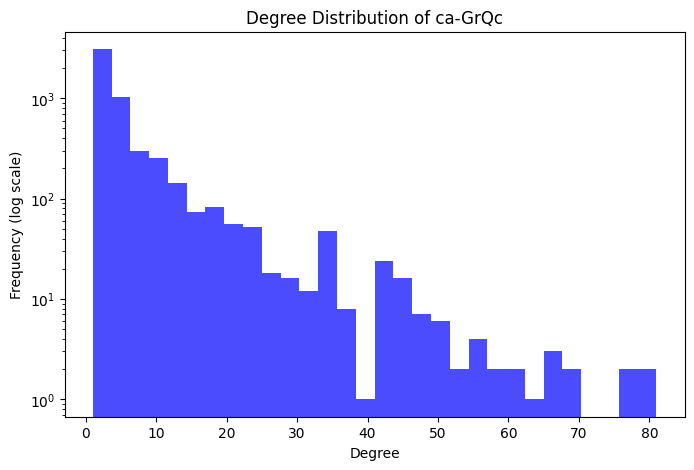

In [7]:
# Compute and plot degree distribution
degrees = [deg for _, deg in nx_graph.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=30, color="blue", alpha=0.7)
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution of ca-GrQc")
plt.show()

In [ ]:
# Compute largest connected component
largest_cc = max(nx.connected_components(nx_graph), key=len)
nx_graph = nx_graph.nx_graph(largest_cc)

**Walktrap Algorithm (Random Walk)**

Detected 417 communities using Walktrap


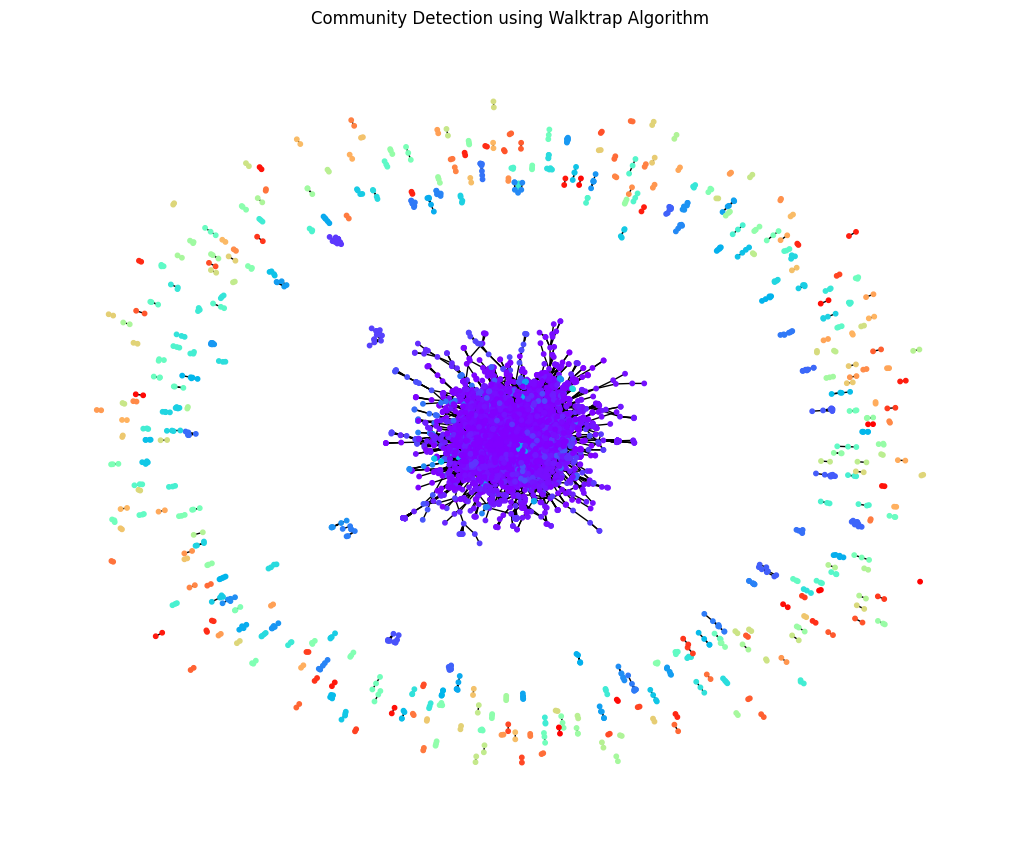

In [ ]:
#  Walktrap Algorithm (Random Walk)
from networkx.algorithms.community import greedy_modularity_communities
walktrap_communities = list(greedy_modularity_communities(nx_graph))
print(f"Detected {len(walktrap_communities)} communities using Walktrap")

# Assign colors for visualization
walktrap_partition = {}
for i, comm in enumerate(walktrap_communities):
    for node in comm:
        walktrap_partition[node] = i

# Visualize Walktrap Communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph, seed=42)
nx.draw(nx_graph, pos, edgelist = no_loop, node_color=[walktrap_partition[n] for n in nx_graph.nodes()],
        node_size=10, cmap=plt.cm.rainbow, with_labels=False)
plt.title("Community Detection using Walktrap Algorithm")
plt.show()

Walktrap is based on short random walks: it assumes that random walks tend to stay within the same community. In the GR-QC network:

- The central core remains prominent, but the method tends to produce **more fragmented**, **localized communities**.
- Captures **micro-scale structure** better, showing internal cohesion among smaller groups.
- Suitable for discovering tightly-knit research teams or small labs.

Walktrap is moderately scalable and provides fine-grained community detection.

In [13]:
from networkx.algorithms.community import asyn_fluidc, girvan_newman

**Girvan-Newman 
Algorithm (Edge Betweenness)**

Detected 356 communities using Girvan-Newman


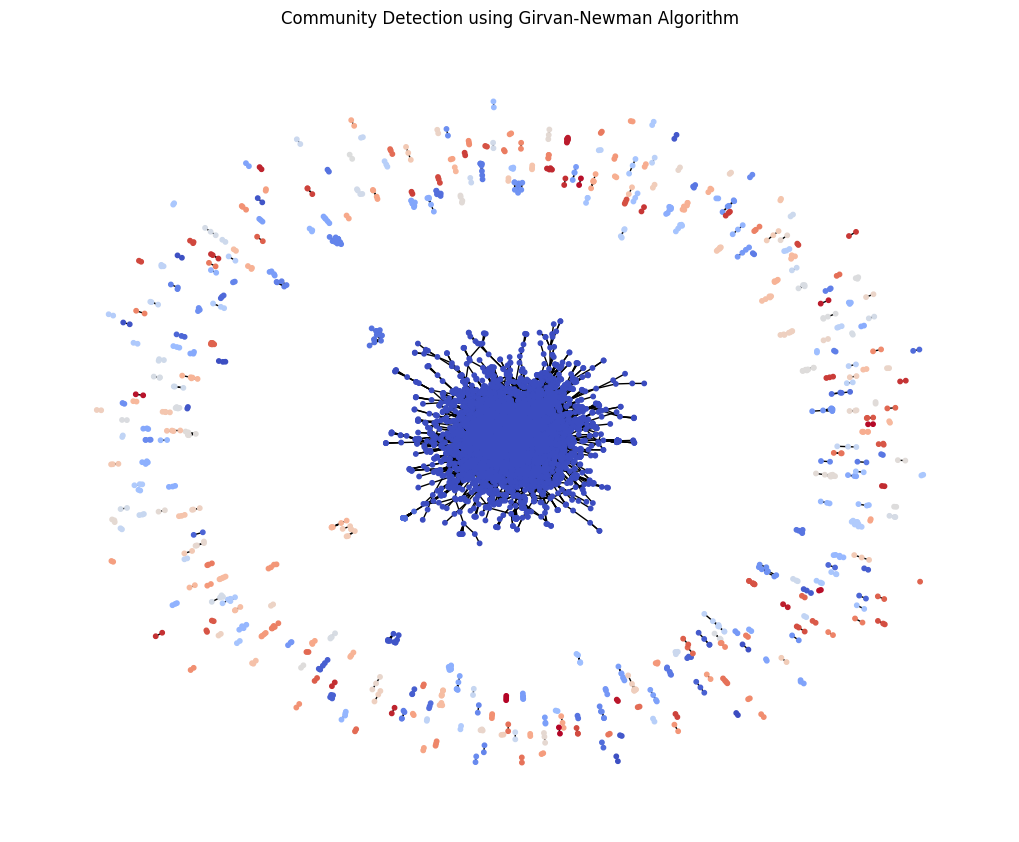

In [ ]:
#  Girvan-Newman Algorithm (Edge Betweenness)
gn_generator = girvan_newman(nx_graph)
gn_communities = next(gn_generator)  # Get first split
gn_partition = {node: i for i, comm in enumerate(gn_communities) for node in comm}

print(f"Detected {len(gn_communities)} communities using Girvan-Newman")

# Visualize Girvan-Newman Communities
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, pos, edgelist = no_loop, node_color=[gn_partition[n] for n in nx_graph.nodes()],
        node_size=10, cmap=plt.cm.coolwarm, with_labels=False)
plt.title("Community Detection using Girvan-Newman Algorithm")
plt.show()

Girvan–Newman is based on removing edges with the highest betweenness centrality. It identifies edges that act as bridges between communities and removes them iteratively. For the GR-QC network:

- This method highlights **major structural separations**, dividing the network into a few large communities.
- It’s effective in identifying **top-level hierarchical structures**, but may overlook finer community distinctions.
- Less scalable and computationally intensive on large graphs.


-----------------------------------------------------------------------------------------

### Comparative Summary

| Feature               | Louvain               | Walktrap               | Girvan-Newman         |
|----------------------|------------------------|------------------------|------------------------|
| Detection Principle  | Modularity             | Random Walks           | Edge Betweenness      |
| Granularity          | Balanced               | Fine-grained           | Coarse / Hierarchical |
| Scalability          | Excellent              | Moderate               | Low                   |
| Strength             | Clear modular structure| Local cohesion         | Detects major splits  |
| Weakness             | May overlook small groups | Overfragmentation    | Computationally heavy |

